# 5.1.5

In [79]:
import random

def montyHall(choice, switch):
    if choice==2 and switch == True:
        return 0
    elif choice==2 and switch == False:
        return 1
    elif choice !=2 and switch == True:
        return 1
    else:
        return 0
    
def monteMonty(trials):
    results = []

    for i in range(trials):
        choice = random.randint(0,2)
        results.append(montyHall(choice, True))
        
    return sum(results)/trials

In [81]:
monteMonty(1000000)

0.666236

### Conclusions:

Looks like we should always switch doors when playing the Monty Hall game -- that gives us a 2/3 chance of winning!  

This is contrary to intuition -- you'd think that switching doors shouldn't make a difference.  This problem is one of the most famous probability brain-teasers of the 20th century and has influenced an entire genre of research.

# 5.1.6

In [95]:
import random

def montePi(darts):
    results = 0

    for i in range(darts):
        x = random.random()
        y = random.random()
        if x*x + y*y < 1:      # translation:  "if the distance of (x,y) is less than 1"
            results +=1
        
    return(results/darts*4)

In [107]:
montePi(10000000)

3.1417516

### Conclusions:  

Pretty accurate approximation for $\pi$!  Compare to true value below:

In [89]:
import math; math.pi

3.141592653589793

# 5.1.7

In [68]:
import random


def gbu():
    
    goodAlive = True;   badAlive  = True;  uglyAlive = True 
    goodAfter = True;   badAfter  = True;  uglyAfter = True
    rounds = 0
    
    while sum([goodAlive,badAlive,uglyAlive])>1:
        
        goodHit = goodAlive and random.random()<.8 
        badHit  = badAlive  and random.random()<.7 
        uglyHit = uglyAlive and random.random()<.6 
        
        if  goodHit  and  badAlive:
            badAfter  = False
        elif goodHit and  uglyAlive:
            uglyAfter = False
            
        
        if  badHit  and  goodAlive:
            goodAfter = False
        elif badHit and  uglyAlive:
            uglyAfter = False
        
        
        if  uglyHit and badAlive:
            badAfter  = False
        elif uglyHit and goodAlive:
            goodAfter = False
            
            
        goodAlive = goodAfter
        badAlive  = badAfter
        uglyAlive = uglyAfter
        
        rounds +=1
        
    if  goodAlive:
        return([1,rounds])
    elif badAlive:
        return([2, rounds])
    elif uglyAlive:
        return([3, rounds])
    else:
        return([0, rounds])
    
def monteGBU(trials):
    
    totals = [0,0,0,0]
    rounds = 0
    maxRounds = 0
    
    for i in range(trials):
        results = gbu()
        totals[results[0]] += 1
        rounds += results[1]
        if results[1]>maxRounds:
            maxRounds = results[1]
        
    print("All Dead:   "+str(totals[0]/trials) )
    print("Good Alive: "+str(totals[1]/trials) ) 
    print("Bad Alive:  "+str(totals[2]/trials) )
    print("Ugly Alive: "+str(totals[3]/trials) )
    print("Avg Rounds: "+str(rounds/trials))
    print("Max Rounds: "+str(maxRounds))
    
    import matplotlib as mpl
    import matplotlib.pyplot as pyplot
    pyplot.style.use("dark_background")


    mpl.rcParams['figure.dpi'] = 90
    
    pyplot.bar(["None","Good","Bad","Ugly"], [totals[0]/trials, totals[1]/trials, totals[2]/trials,totals[3]/trials])
    pyplot.title("Who Lived?")
    pyplot.show()

All Dead:   0.174344
Good Alive: 0.098427
Bad Alive:  0.018362
Ugly Alive: 0.708867
Avg Rounds: 1.396551
Max Rounds: 8


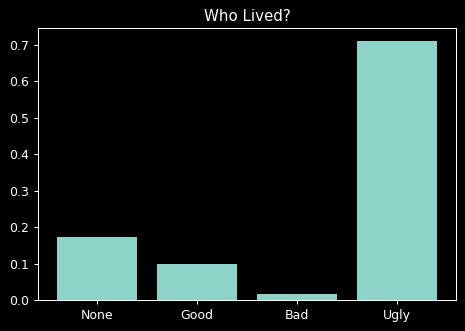

In [71]:
monteGBU(1000000)

### Conclusions
- Looks like "The Bad" is most likely to die.  Makes sense -- there are two people shooting at him in the first round!  
- It also looks like "The Ugly" is most likely to survive.  Makes sense -- nobody is shooting at him in the first round!
- On average, it took between 1-2 rounds to settle the standoff (with maximum in my simulation of 8 rounds)

# 5.4.14

In [3]:
def mystery(a,b):
    results = []
    results.append(a)
    results.append(b)
    results.append((a+b)%10)
    
    while results[-2]!=a or results[-1]!=b:
        results.append(   ( results[-2] + results[-1] )%10   )
       
    return(len(results))

In [4]:
mystery(1,1)

62

The algorithm is simple but the results are unexpected.  Look at the plots below showing all combinations of integers from 0 to 9.  

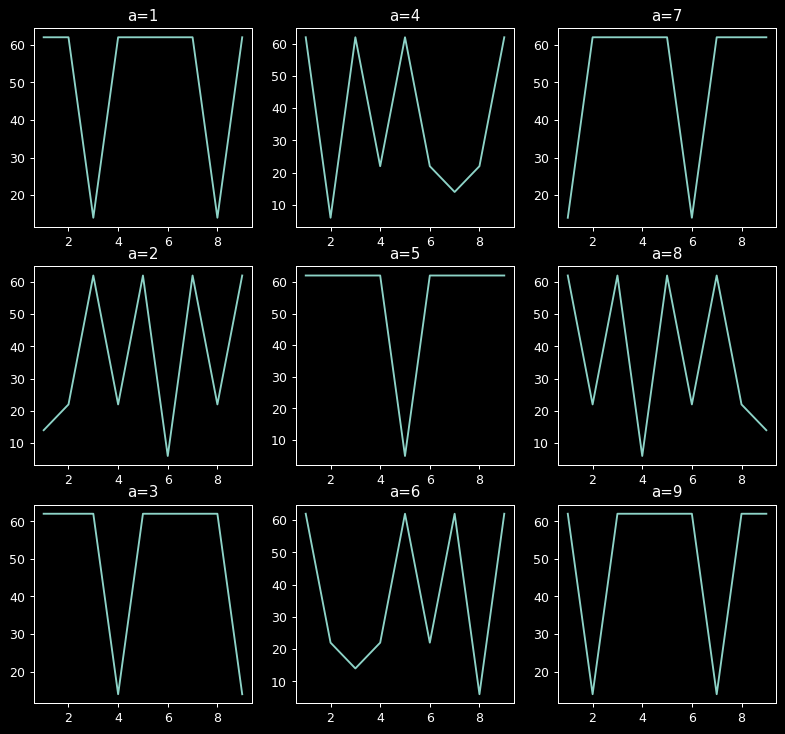

In [173]:
import matplotlib as mpl
import matplotlib.pyplot as pyplot

pyplot.style.use("dark_background")


mpl.rcParams['figure.dpi'] = 90


fig, axs = pyplot.subplots(3,3)

axs[0,0].plot([x for x in range(1,10)], [mystery(1,y) for y in range(1,10)])
axs[0, 0].set_title("a=1")
axs[1,0].plot([x for x in range(1,10)], [mystery(2,y) for y in range(1,10)])
axs[1,0].set_title("a=2")

axs[2,0].plot([x for x in range(1,10)], [mystery(3,y) for y in range(1,10)])
axs[2,0].set_title("a=3")

axs[0,1].plot([x for x in range(1,10)], [mystery(4,y) for y in range(1,10)])
axs[0,1].set_title("a=4")

axs[1,1].plot([x for x in range(1,10)], [mystery(5,y) for y in range(1,10)])
axs[1,1].set_title("a=5")

axs[2,1].plot([x for x in range(1,10)], [mystery(6,y) for y in range(1,10)])
axs[2,1].set_title("a=6")

axs[0,2].plot([x for x in range(1,10)], [mystery(7,y) for y in range(1,10)])
axs[0,2].set_title("a=7")

axs[1,2].plot([x for x in range(1,10)], [mystery(8,y) for y in range(1,10)])
axs[1,2].set_title("a=8")

axs[2,2].plot([x for x in range(1,10)], [mystery(9,y) for y in range(1,10)])
axs[2,2].set_title("a=9")


pyplot.subplots_adjust(top=2, right=1.5)

In [ ]:
def goodBadUgly():
    
    living = [True, True, True]
    livingAfter = [True, True, True]
    rounds = 0
    
    while sum(living) > 1:
    
        hits = [  (living[0] and random.random()<=.8), \
                  (living[1] and random.random()<=.7), \
                  (living[2] and random.random()<=.6)  ]
    
        if hits[0] and living[1]:            #if Good hits and Bad is alive
            livingAfter[1]=False
        elif hits[0] and living[2]:          #else if Bad is dead and Ugly is alive
            livingAfter[2]=False
            
        if hits[1] and living[0]:            #if Bad hits and Good is alive
            livingAfter[0]=False
        elif hits[1] and living[2]:          #else if Good is dead and Ugly is alive
            livingAfter[2]=False
            
        if hits[2] and living[1]:            #if Ugly hits and Bad is alive
            livingAfter[1]=False
        elif hits[2]  and living[0]:         #else if Bad is dead and Good is alive
            livingAfter[0] = False
            
            
        living = livingAfter
        rounds +=1 
            
    if living[0]:
        return([1, rounds])
    elif living[1]:
        return([2, rounds])
    elif living[2]:
        return([3, rounds])
    else:
        return([0, rounds])
            
        
def monteGBU(trials):
    
    totals = [0,0,0,0]
    rounds = 0
    maxRounds = 0
    
    for i in range(trials):
        results = goodBadUgly()
        totals[results[0]] += 1
        rounds += results[1]
        if results[1]>maxRounds:
            maxRounds = results[1]
        
    print("All Dead:   "+str(totals[0]/trials) )
    print("Good Alive: "+str(totals[1]/trials) ) 
    print("Bad Alive:  "+str(totals[2]/trials) )
    print("Ugly Alive: "+str(totals[3]/trials) )
    print("Avg Rounds: "+str(rounds/trials))
    print("Max Rounds: "+str(maxRounds))